In [7]:

!pip install pandas
!pip install scikit-learn
!pip install matplot

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import warnings

In [12]:
# Ignorar warnings futuros do scikit-learn (como o n_init)
warnings.filterwarnings("ignore", category=FutureWarning)

#Importação dos dados 
try:
    df = pd.read_csv('data_1.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'data_1.csv' ainda não foi encontrado.")
    # Se houver um problema inesperado, paramos.
    exit()

#visualizar a amostra de dados
print("Amostra dos dados originais:")
print(df.head())

Amostra dos dados originais:
          X1        X2        X3         X4
0   1.296150  0.616459  0.536597  10.404695
1   0.284791 -0.309378 -0.028529   9.675270
2   9.044055 -0.345982 -0.463596   0.481481
3  10.578521  0.349654 -0.764144  -1.437791
4  -1.945703  9.087217  0.219510   0.393063


In [13]:
#normatização dos dados 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print("\nAmostra dos dados normalizados:")
print(df_scaled.head())


Amostra dos dados normalizados:
         X1        X2        X3        X4
0 -0.263994 -0.416775 -0.429082  1.767617
1 -0.490427 -0.628780 -0.553651  1.603617
2  1.470678 -0.637162 -0.649551 -0.463467
3  1.814229 -0.477870 -0.715800 -0.894986
4 -0.989810  1.522926 -0.498977 -0.483347


In [15]:
#Testantdo diferente Valores de k
sse = [] #Guarda o erro quadratico medio de cada clusterização, "inercia"
silhouette_scores= [] #Guarda o valor do coeficiente Shilhouette para cada k (KMeans).
db_scores_kmeans = [] # Guarda o valor do Davies-Bouldin para cada k (KMeans).
silhouette_scores_agglo = [] # Guarda o Silhouette para Agglomerative
db_scores_agglo = [] # Guarda o Davies-Bouldin para Agglomerative

K = range(2,11) #Testa os valores de k 2 a 10 

print("\nCalculando métricas para KMeans e Agglomerative (k=2 a 10)...")
for k in K:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) #Cria o modlo Kmens para o dado k
    kmeans.fit(df_scaled)#Executa a clustrização
    labels_k = kmeans.labels_
    sse.append(kmeans.inertia_)#media da soma dos erros 
    silhouette_scores.append(silhouette_score(df_scaled, labels_k))#Mede a separação entre cluster e a coerencia interna dos agrupamentos , quanto mais proximo de 1 melhor a separação
    db_scores_kmeans.append(davies_bouldin_score(df_scaled, labels_k))
    
    # Agglomerative
    agglo = AgglomerativeClustering(n_clusters=k)
    labels_a = agglo.fit_predict(df_scaled)
    silhouette_scores_agglo.append(silhouette_score(df_scaled, labels_a))
    db_scores_agglo.append(davies_bouldin_score(df_scaled, labels_a))

print("Cálculos concluídos.")



Calculando métricas para KMeans e Agglomerative (k=2 a 10)...
Cálculos concluídos.


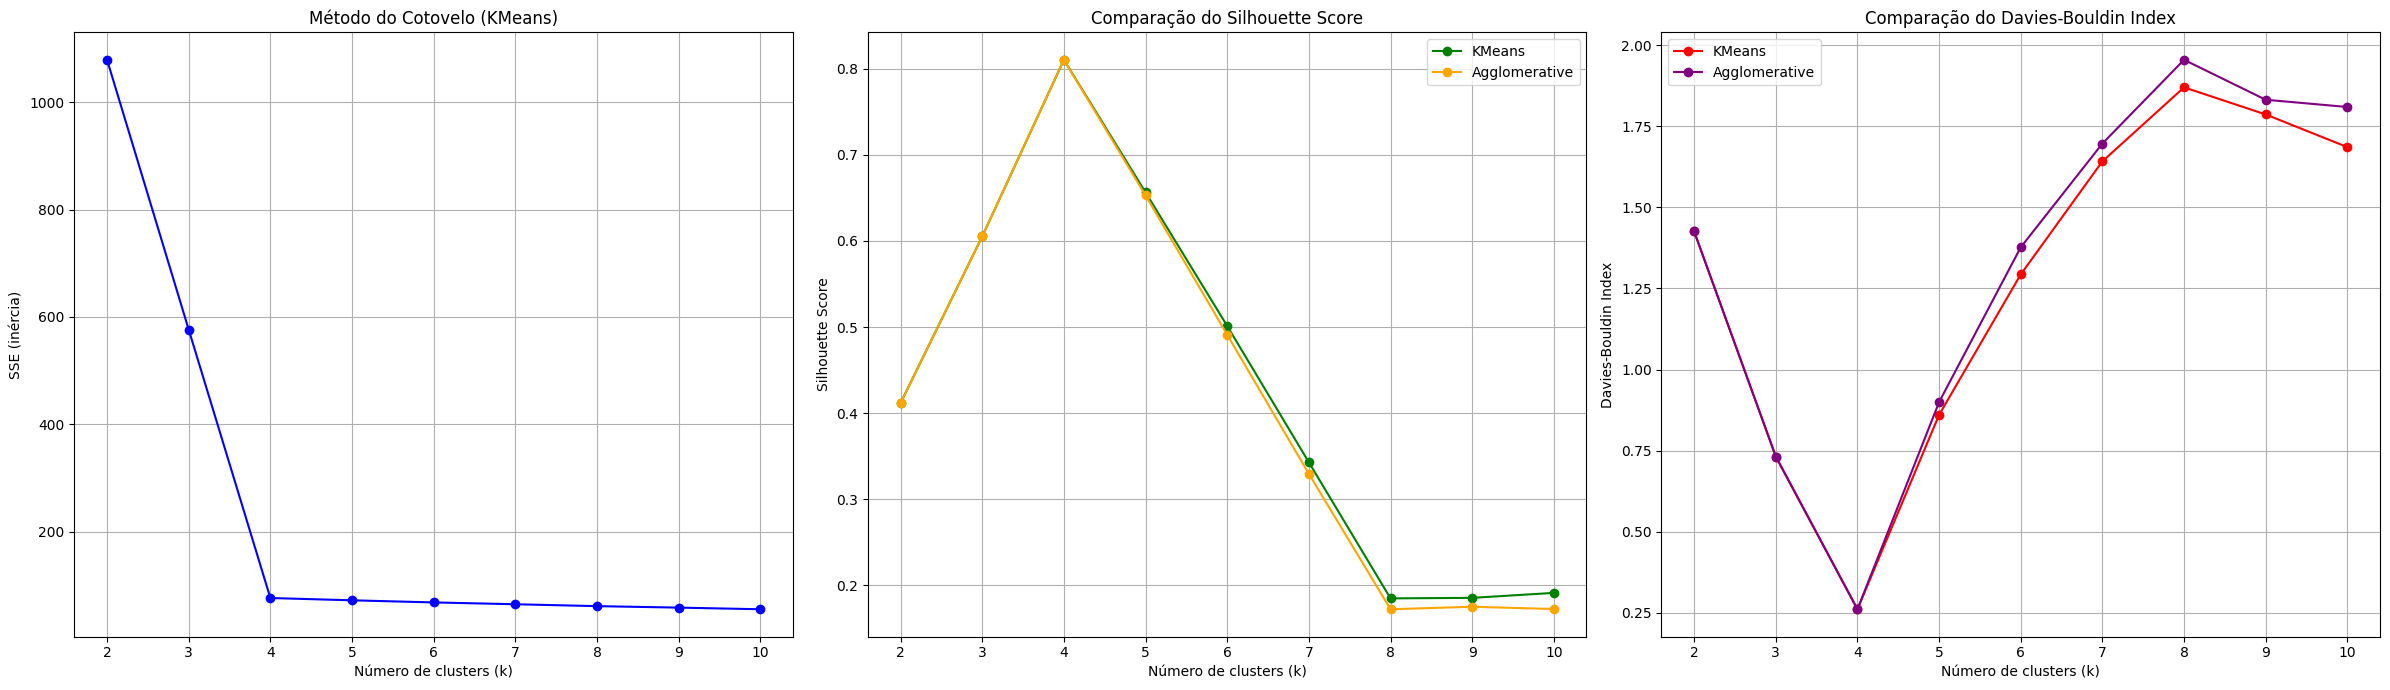

<Figure size 640x480 with 0 Axes>

In [ ]:
fig_metrics, axes = plt.subplots(1, 3, figsize=(24, 7))

# Gráfico 1: Método do Cotovelo (SSE)
axes[0].plot(K, sse, '-o', color='blue')
axes[0].set_xlabel('Número de clusters (k)')
axes[0].set_ylabel('SSE (inércia)')
axes[0].set_title('Método do Cotovelo (KMeans)')
axes[0].grid(True)
axes[0].set_xticks(K) # Garante que todos os valores de K sejam mostrados no eixo x

# Gráfico 2: Comparação do Silhouette Score
axes[1].plot(K, silhouette_scores, '-o', label='KMeans', color='green')
axes[1].plot(K, silhouette_scores_agglo, '-o', label='Agglomerative', color='orange')
axes[1].set_xlabel('Número de clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Comparação do Silhouette Score')
axes[1].legend()
axes[1].grid(True)
axes[1].set_xticks(K)

# Gráfico 3: Comparação do Davies-Bouldin Index
axes[2].plot(K, db_scores_kmeans, '-o', label='KMeans', color='red')
axes[2].plot(K, db_scores_agglo, '-o', label='Agglomerative', color='purple')
axes[2].set_xlabel('Número de clusters (k)')
axes[2].set_ylabel('Davies-Bouldin Index')
axes[2].set_title('Comparação do Davies-Bouldin Index')
axes[2].legend()
axes[2].grid(True)
axes[2].set_xticks(K)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

plt.show()
plt.savefig('metricas_comparacao_lado_a_lado.png')
plt.clf() 


In [29]:
print('\n****Respondendo as Questoes (Assumindo k=4)****')
k_final = 4
# Rodar KMeans com k=4
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
labels_kmeans = kmeans_final.fit_predict(df_scaled)

# Rodar Agglomerative com k=4
agglo_final = AgglomerativeClustering(n_clusters=k_final)
labels_agglo = agglo_final.fit_predict(df_scaled)




****Respondendo as Questoes (Assumindo k=4)****


In [22]:
# 1. Quantidade de clusters
num_clusters = len(set(labels_kmeans))
print('\nQuestão 1 (KMeans k=4):')
print(f"Quantidade de clusters: {num_clusters}")


Questão 1 (KMeans k=4):
Quantidade de clusters: 4


In [24]:
# 2. Quantos pontos há em cada cluster
points_per_cluster = pd.Series(labels_kmeans).value_counts().sort_index()
print('\nQuestão 2 (KMeans k=4):')
print("Quantidade de pontos por cluster:")
print(points_per_cluster)


Questão 2 (KMeans k=4):
Quantidade de pontos por cluster:
0    100
1    100
2    100
3    100
Name: count, dtype: int64


In [25]:
# 3. Silhouette Score
silhouette = silhouette_score(df_scaled, labels_kmeans)
print('\nQuestão 3 (KMeans k=4):')
print(f"Coeficiente de Silhouette: {silhouette:.3f}")



Questão 3 (KMeans k=4):
Coeficiente de Silhouette: 0.810


In [26]:
# 4. Davies-Bouldin Index (quanto menor, melhor)
db_index = davies_bouldin_score(df_scaled, labels_kmeans)
print('\nQuestão 4 (KMeans k=4):')
print(f"Coeficiente de Davies-Bouldin: {db_index:.3f}")



Questão 4 (KMeans k=4):
Coeficiente de Davies-Bouldin: 0.261


In [32]:
# 5. Métricas Agglomerative (k=4)
silhouette_agglo = silhouette_score(df_scaled, labels_agglo)
db_index_agglo = davies_bouldin_score(df_scaled, labels_agglo)
points_per_cluster_agglo = pd.Series(labels_agglo).value_counts().sort_index()

 
print('\nQuestão 5 (Comparação k=4):')
print(f"Silhouette Agglomerative: {silhouette_agglo:.3f} vs Silhouette KMeans: {silhouette:.3f}")
print(f"Davies-Bouldin Agglomerative: {db_index_agglo:.3f} vs Davies-Bouldin KMeans: {db_index:.3f}")
print("Pontos por cluster (Agglomerative k=4):")
print(points_per_cluster_agglo)
 


Questão 5 (Comparação k=4):
Silhouette Agglomerative: 0.810 vs Silhouette KMeans: 0.810
Davies-Bouldin Agglomerative: 0.261 vs Davies-Bouldin KMeans: 0.261
Pontos por cluster (Agglomerative k=4):
0    100
1    100
2    100
3    100
Name: count, dtype: int64


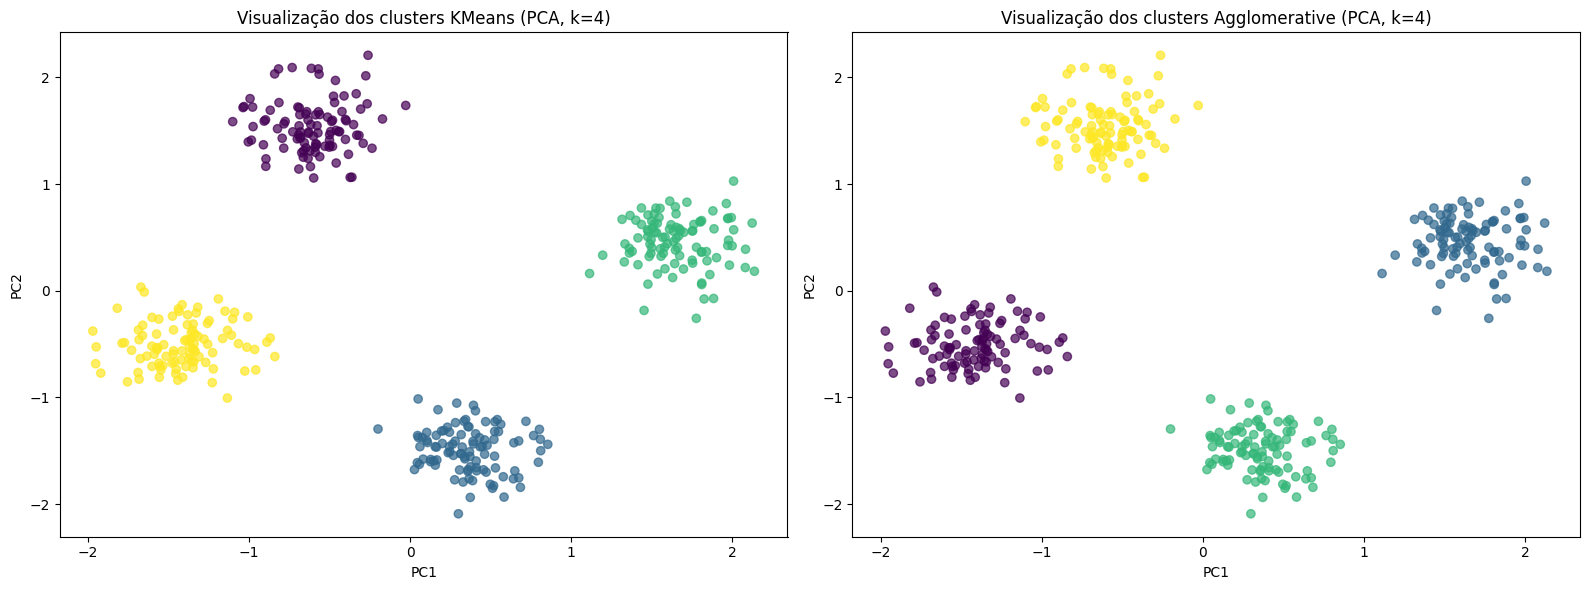

In [33]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)


# Visualização PCA lado a lado (Como já estava no original)
fig_pca, axes_pca = plt.subplots(1, 2, figsize=(16, 6))
axes_pca[0].scatter(pca_data[:,0], pca_data[:,1], c=labels_kmeans, cmap='viridis', alpha=0.7)
axes_pca[0].set_title('Visualização dos clusters KMeans (PCA, k=4)')
axes_pca[0].set_xlabel('PC1')
axes_pca[0].set_ylabel('PC2')
axes_pca[1].scatter(pca_data[:,0], pca_data[:,1], c=labels_agglo, cmap='viridis', alpha=0.7)
axes_pca[1].set_title('Visualização dos clusters Agglomerative (PCA, k=4)')
axes_pca[1].set_xlabel('PC1')
axes_pca[1].set_ylabel('PC2')
plt.tight_layout()
plt.show()

